In [ ]:
fetch Trades
BTCほz

In [1]:
import ccxt
import json
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab
from datetime import datetime
# import seaborn as sns
import pickle
print(ccxt.exchanges) # print a list of all available exchange classes

['_1broker', '_1btcxe', 'acx', 'allcoin', 'anxpro', 'binance', 'bit2c', 'bitbay', 'bitcoincoid', 'bitfinex', 'bitfinex2', 'bitflyer', 'bithumb', 'bitlish', 'bitmarket', 'bitmex', 'bitso', 'bitstamp1', 'bitstamp', 'bittrex', 'bl3p', 'bleutrade', 'btcbox', 'btcchina', 'btcexchange', 'btcmarkets', 'btctradeua', 'btcturk', 'btcx', 'bter', 'bxinth', 'ccex', 'cex', 'chbtc', 'chilebit', 'coincheck', 'coinfloor', 'coingi', 'coinmarketcap', 'coinmate', 'coinsecure', 'coinspot', 'cryptopia', 'dsx', 'exmo', 'flowbtc', 'foxbit', 'fybse', 'fybsg', 'gatecoin', 'gdax', 'gemini', 'hitbtc', 'hitbtc2', 'huobi', 'huobicny', 'huobipro', 'independentreserve', 'itbit', 'jubi', 'kraken', 'lakebtc', 'livecoin', 'liqui', 'luno', 'mercado', 'mixcoins', 'nova', 'okcoincny', 'okcoinusd', 'okex', 'paymium', 'poloniex', 'quadrigacx', 'qryptos', 'quoine', 'southxchange', 'surbitcoin', 'tidex', 'therock', 'urdubit', 'vaultoro', 'vbtc', 'virwox', 'wex', 'xbtce', 'yobit', 'yunbi', 'zaif']


In [17]:
coincheck = ccxt.coincheck()
zaif = ccxt.zaif()
bitflyer = ccxt.bitflyer()
quoine = ccxt.quoine()
binance = ccxt.binance()
bittrex = ccxt.bittrex()
bitfinex = ccxt.bitfinex()

In [ ]:
CREATE TABLE trades  (
id int NOT NULL AUTO_INCREMENT,
exchange_name text,
pair_name text,
trade_id int,
timestamp BIGINT,
price float,
amount float,
buy_sell_type int,
PRIMARY KEY (`id`)
);

In [1]:
# """
# CREATE TABLE bittrex_trades  (
# id int NOT NULL AUTO_INCREMENT,
# bittrex_trade_id int,
# timestamp datetime,
# price float,
#  amount float,
#  buy_sell_type int,
# PRIMARY KEY (`id`)
# );

# """

    100% |████████████████████████████████| 11.9MB 43kB/s 
  Running setup.py bdist_wheel for mysql-connector-python-rf ... - \ | / done
  Stored in directory: /Users/take/Library/Caches/pip/wheels/bb/53/e4/dced82f8a15f96a8afbe626ebb2939d2901b29e610a97fc1ba
Successfully built mysql-connector-python-rf


In [45]:
from urllib.parse import urlparse
import mysql.connector

url = urlparse('mysql://take@localhost:3306/bitcoin')

conn = mysql.connector.connect(
    host = url.hostname or 'take',
    port = url.port or 3306,
    user = url.username or 'root',
    password = url.password or '',
    database = url.path[1:],
)

In [46]:
conn.is_connected()

True

In [47]:
conn.ping(reconnect=True)

In [48]:
cur = conn.cursor()

In [49]:
cur.execute('SELECT * FROM trades')
cur.fetchall()

[]

In [ ]:
1秒ごとに回す
過去100取引をdictionaryにいれておく
取引所idとtrade idをひいて、かぶっていなければ、insert

In [30]:
# sql_string = "INSERT IGNORE INTO trades (bittrex_trade_id,timestamp,price,amount,buy_sell_type)  \
# SELECT * FROM (SELECT (%s,%s,%s,%s,%s)) AS tmp \
# WHERE NOT EXISTS (  \
#     SELECT bittrex_trade_id FROM bittrex_trades WHERE bittrex_trade_id = %s  \
# ) LIMIT 1;"

In [ ]:
# SELECT * FROM (SELECT (145862691,"2018-02-18T01:50:28.633",0.02052002,2.63045673,1)) AS tmp \
# WHERE NOT EXISTS (  \
#     SELECT bittrex_trade_id FROM bittrex_trades WHERE bittrex_trade_id = 145862691  \
# ) LIMIT 1;

In [65]:
len(bittrex.fetchTrades(pair_name))

100

In [63]:
cur.execute('SELECT * FROM trades')
cur.fetchall()

[(1, 'bittrex', 'LTC/BTC', 145921666, 1518937679000, 0.0206583, 3.2505, 0),
 (2, 'bittrex', 'LTC/BTC', 145921658, 1518937676000, 0.0206583, 0.44959, 1),
 (3, 'bittrex', 'LTC/BTC', 145921638, 1518937660000, 0.0206583, 0.661521, 1),
 (4, 'bittrex', 'LTC/BTC', 145921767, 1518937719000, 0.0207923, 0.220255, 0),
 (5, 'bittrex', 'LTC/BTC', 145921766, 1518937719000, 0.0207923, 0.1381, 0),
 (6, 'bittrex', 'LTC/BTC', 145921765, 1518937719000, 0.0207923, 0.655422, 0),
 (7, 'bittrex', 'LTC/BTC', 145921734, 1518937707000, 0.0206584, 0.655422, 1),
 (8, 'bittrex', 'LTC/BTC', 145921706, 1518937700000, 0.0207923, 0.315146, 0),
 (9, 'bittrex', 'LTC/BTC', 145921705, 1518937700000, 0.0207923, 0.165719, 0),
 (10, 'bittrex', 'LTC/BTC', 145921666, 1518937679000, 0.0206583, 3.2505, 0),
 (11, 'bittrex', 'LTC/BTC', 145921658, 1518937676000, 0.0206583, 0.44959, 1),
 (12, 'bittrex', 'LTC/BTC', 145921638, 1518937660000, 0.0206583, 0.661521, 1),
 (13, 'bittrex', 'LTC/BTC', 145921617, 1518937654000, 0.0207926, 1.47

In [62]:
from time import sleep

pair_name = "LTC/BTC"
bittrex = ccxt.bittrex()
trade_id_set_prev_loop  = set()
while True:
    trades=bittrex.fetchTrades(pair_name)
    print("len(trades)")
    print(len(trades))
    trade_id_set_this_loop  = set()
    for trade in trades:
        
#         print(trade)
        price = trade["price"]
        amount = trade["amount"]
#         datetime = trade["datetime"]
        timestamp = trade["timestamp"]
        trade_id = trade["id"]
        trade_id_set_this_loop.add(trade_id)
        if trade["side"] == "sell":
            side = 1
        elif trade["side"] == "buy":
            side = 0
#         print(amount,datetime,trade_id,side)
        
        # 前回
        if trade_id in trade_id_set_prev_loop:
            sql_string = "INSERT INTO trades \
            (exchange_name,pair_name,trade_id,timestamp,price,amount,buy_sell_type) \
            VALUES (%s,%s,%s,%s,%s,%s,%s)"

            try:
                cur.execute(sql_string, ["bittrex",pair_name,trade_id,timestamp,price,amount,side])
                # cur.execute('INSERT INTO bittrex_trades (bittrex_trade_id,timestamp,price,amount,buy_sell_type) VALUES (%s,%s,%s,%s)', [145862691,"2018-02-18T01:50:28.633",0.02052002,2.63045673,1])
                conn.commit()
            except:

                conn.rollback()
                raise
            

    trade_id_set_prev_loop = trade_id_set_this_loop
    print("aaaa")
    sleep(10)

len(trade)
9
aaaa
len(trade)
9
aaaa


KeyboardInterrupt: 

In [20]:
pair_name = "LTC/BTC"
bitfinex = ccxt.bitfinex({"verbose":True})
bitfinex.fetchTrades(pair_name)

https://api.bitfinex.com/v1/symbols_details GET https://api.bitfinex.com/v1/symbols_details 
Request: {'User-Agent': 'ccxt/1.9.151 (+https://github.com/ccxt-dev/ccxt) Python/3.5.1', 'Accept-Encoding': 'gzip, deflate'} None
GET https://api.bitfinex.com/v1/symbols_details 
Response: Date: Sat, 17 Feb 2018 14:12:15 GMT
Content-Type: application/json; charset=utf-8
Transfer-Encoding: chunked
Connection: close
Set-Cookie: __cfduid=dc2f9b7668a9a3c88e6eda570020606941518876734; expires=Sun, 17-Feb-19 14:12:14 GMT; path=/; domain=.bitfinex.com; HttpOnly
Vary: Accept-Encoding
X-Frame-Options: SAMEORIGIN
X-XSS-Protection: 1; mode=block
X-Content-Type-Options: nosniff
ETag: W/"0950e8d04166fc9f49daf97858f8f8ad"
Cache-Control: max-age=0, private, must-revalidate
X-Request-Id: f0fcfd4e-638a-4d2a-af63-4889b7e891fc
X-Runtime: 0.168477
Strict-Transport-Security: max-age=31536000
X-Frame-Options: SAMEORIGIN
Content-Encoding: gzip
Expect-CT: max-age=604800, report-uri="https://report-uri.cloudflare.com/cd

[{'amount': 0.4209,
  'datetime': '2018-02-17T14:12:11.000Z',
  'id': '197542198',
  'info': {'amount': '0.4209',
   'exchange': 'bitfinex',
   'price': '0.021047',
   'tid': 197542198,
   'timestamp': 1518876731,
   'type': 'sell'},
  'price': 0.021047,
  'side': 'sell',
  'symbol': 'LTC/BTC',
  'timestamp': 1518876731000,
  'type': None},
 {'amount': 0.20460532,
  'datetime': '2018-02-17T14:12:11.000Z',
  'id': '197542194',
  'info': {'amount': '0.20460532',
   'exchange': 'bitfinex',
   'price': '0.021046',
   'tid': 197542194,
   'timestamp': 1518876731,
   'type': 'sell'},
  'price': 0.021046,
  'side': 'sell',
  'symbol': 'LTC/BTC',
  'timestamp': 1518876731000,
  'type': None},
 {'amount': 0.42686115,
  'datetime': '2018-02-17T14:11:54.000Z',
  'id': '197542093',
  'info': {'amount': '0.42686115',
   'exchange': 'bitfinex',
   'price': '0.021061',
   'tid': 197542093,
   'timestamp': 1518876714,
   'type': 'buy'},
  'price': 0.021061,
  'side': 'buy',
  'symbol': 'LTC/BTC',
  't

In [16]:
trades

[{'amount': 1.84957611,
  'datetime': '2018-02-18T02:12:07.000Z',
  'id': '145866524',
  'info': {'FillType': 'PARTIAL_FILL',
   'Id': 145866524,
   'OrderType': 'SELL',
   'Price': 0.02055145,
   'Quantity': 1.84957611,
   'TimeStamp': '2018-02-18T02:12:07.263',
   'Total': 0.03801147},
  'price': 0.02055145,
  'side': 'sell',
  'symbol': 'LTC/BTC',
  'timestamp': 1518919927000,
  'type': 'limit'},
 {'amount': 2.40855712,
  'datetime': '2018-02-18T02:12:07.000Z',
  'id': '145866523',
  'info': {'FillType': 'FILL',
   'Id': 145866523,
   'OrderType': 'SELL',
   'Price': 0.02057097,
   'Quantity': 2.40855712,
   'TimeStamp': '2018-02-18T02:12:07.263',
   'Total': 0.04954635},
  'price': 0.02057097,
  'side': 'sell',
  'symbol': 'LTC/BTC',
  'timestamp': 1518919927000,
  'type': 'limit'},
 {'amount': 3.09682417,
  'datetime': '2018-02-18T02:12:06.000Z',
  'id': '145866520',
  'info': {'FillType': 'PARTIAL_FILL',
   'Id': 145866520,
   'OrderType': 'SELL',
   'Price': 0.02057097,
   'Quan

In [ ]:
# binanceででる
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# http://shinespark.hatenablog.com/entry/2015/12/06/100000

In [8]:
# TODO 今、集計された取引履歴になってるから aggTrades
# 集計されていない取引履歴にする historicalTrades
# historicalTradesは{"code":-2014,"msg":"API-key format invalid."}になる
# kusa_symbol_id = 
binance.fetchTrades("LTC/BTC")

[{'amount': 0.98,
  'cost': 0.020625079999999997,
  'datetime': '2018-02-17T13:28:10.000Z',
  'fee': None,
  'id': '6817939',
  'info': {'M': True,
   'T': 1518874089581,
   'a': 6817939,
   'f': 7653035,
   'l': 7653036,
   'm': True,
   'p': '0.02104600',
   'q': '0.98000000'},
  'order': None,
  'price': 0.021046,
  'side': 'buy',
  'symbol': 'LTC/BTC',
  'timestamp': 1518874089581,
  'type': None},
 {'amount': 0.71,
  'cost': 0.014942659999999998,
  'datetime': '2018-02-17T13:28:10.000Z',
  'fee': None,
  'id': '6817940',
  'info': {'M': True,
   'T': 1518874089616,
   'a': 6817940,
   'f': 7653037,
   'l': 7653037,
   'm': False,
   'p': '0.02104600',
   'q': '0.71000000'},
  'order': None,
  'price': 0.021046,
  'side': 'sell',
  'symbol': 'LTC/BTC',
  'timestamp': 1518874089616,
  'type': None},
 {'amount': 0.17,
  'cost': 0.0035776500000000004,
  'datetime': '2018-02-17T13:28:21.000Z',
  'fee': None,
  'id': '6817941',
  'info': {'M': True,
   'T': 1518874101375,
   'a': 681794

In [3]:
def create_df_trade(trade_dict, csv_name):
    dictlist = []
    for key, value in trade_dict.items():
    #     print(key,value)
        dictlist.append(value)

    trade_list = []
    for key, trade in trade_dict.items():
        trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
    df_trade=pd.DataFrame(trade_list)
    df_trade.columns=["coincheck","id","created_at","amount","order_type","rate"]
    df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
    df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)

    df_trade.index=df_trade["created_at"]
    df_trade=df_trade.sort_values('created_at')
    df_trade_amount=df_trade[["amount"]]
    
    df_trade.to_csv(csv_name+datetime.now().strftime('%Y-%m-%d')+".csv")

In [ ]:
i = 0
trade_dict={}
name = "coincheck"
while True:
    try:
        i += 1

        trades=coincheck.fetchTrades("BTC/JPY")
        for trade in trades:
            trade_dict[trade["id"]] = trade
        #     print(trade)
        #     trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
    except:
        print('Failed to access API')
        with open(name+"my_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to access API')
    
    #     書き込み
    try:
        if i %1000 == 0:
            print(i)
            create_df_trade(trade_dict, name)
            with open(name+'_log.pickle', mode='wb') as f:
                pickle.dump(trade_dict, f)
            # TODO:trade_dictが重そうやったらtrade_dict,df_tradeを初期化する
    except:
        print('Failed to write')
        with open(name+"my_error.log", "w") as f:
            f.write(datetime.now().strftime('%Y-%m-%d')+'Failed to write')

Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to access API
Failed to acc

In [35]:
with open('coincheck_log.pickle', mode='wb') as f:
    pickle.dump(trade_dict, f)

In [36]:
len(trade_dict)

5287

In [4]:
def create_df_trade(trade_dict):
    dictlist = []
    for key, value in trade_dict.items():
    #     print(key,value)
        dictlist.append(value)

    trade_list = []
    for key, trade in trade_dict.items():
        trade_list.append(["coincheck",trade["id"],trade["created_at"],trade["amount"],trade["order_type"],trade["rate"]])
    df_trade=pd.DataFrame(trade_list)
    df_trade.columns=["coincheck","id","created_at","amount","order_type","rate"]
    df_trade["created_at"]=pd.to_datetime(df_trade["created_at"])
    df_trade["amount"]=df_trade["amount"].convert_objects(convert_numeric=True)

    df_trade.index=df_trade["created_at"]
    df_trade=df_trade.sort_values('created_at')
    df_trade_amount=df_trade[["amount"]]
    
    df_trade.to_csv("coincheck_0827.csv")

/Users/take/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [39]:
df_trade.head()

,coincheck,id,created_at,amount,order_type,rate
created_at,,,,,,
2017-08-26 06:21:30,coincheck,16480030,2017-08-26 06:21:30,0.0078,sell,472677
2017-08-26 06:21:30,coincheck,16480029,2017-08-26 06:21:30,0.0051,sell,472730
2017-08-26 06:21:35,coincheck,16480032,2017-08-26 06:21:35,0.0020,sell,472686
2017-08-26 06:21:35,coincheck,16480031,2017-08-26 06:21:35,0.0270,sell,472698
2017-08-26 06:21:38,coincheck,16480033,2017-08-26 06:21:38,0.0100,buy,472754


In [40]:
df_trade.to_csv("coincheck_0826_2.csv")

In [41]:
df_summary = df_trade_amount.groupby(pd.TimeGrouper(freq="min")).aggregate(np.sum)[1:]
df_summary.head()

,amount
created_at,
2017-08-26 06:22:00,0.880368
2017-08-26 06:23:00,2.464232
2017-08-26 06:24:00,11.270953
2017-08-26 06:25:00,10.314184
2017-08-26 06:26:00,14.630704


AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

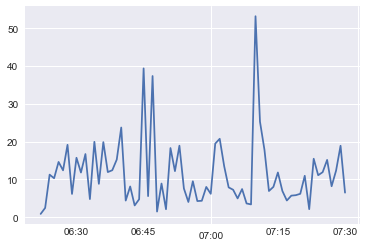

In [42]:
df_summary['amount'].plot()